<a href="https://colab.research.google.com/github/kavyasingh581/EDA-project/blob/main/Hotel_Bookings_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Kavya Singh Bisht


# **Project Summary -**

This project involved a comprehensive Exploratory Data Analysis (EDA) on a hotel bookings dataset, aiming to extract meaningful insights and identify patterns that could drive strategic business decisions for hotels. The dataset encompassed a wide array of information related to hotel reservations, including guest demographics, booking channels, room types, stay durations, and crucially, cancellation statuses. The objective was to understand various factors influencing bookings and cancellations.

1. Data Wrangling and Preprocessing: The initial phase focused on cleaning and preparing the data for analysis. Key steps included:

Handling Missing Values: Columns such as 'children', 'country', 'agent', and 'company' contained missing entries. These were systematically addressed by imputing 'children', 'agent', and 'company' with zeros, under the assumption that a missing entry implied no value (e.g., no children, no assigned agent/company). For 'country', while zeros were initially assigned, subsequent analysis might require more sophisticated imputation or removal depending on its impact.
Data Type Correction: The data types for 'children', 'agent', and 'company' were converted from float to integer, aligning them with their conceptual meaning as counts or identifiers.
Duplicate Removal: A significant number of duplicate records (31,994) were identified and removed, reducing the dataset from 119,390 to 87,396 unique entries. This step was crucial for ensuring the accuracy and integrity of the analysis, preventing biased statistical outcomes.
,two new features were created:
'total_guests': Calculated as the sum of 'adults', 'children', and 'babies', providing a complete count of occupants per booking.
'total_stayes': Derived from the sum of 'stays_in_weekend_nights' and 'stays_in_week_nights', representing the total duration of a stay.
2. Key Visualizations and Insights: A series of visualizations were generated to explore variable distributions, relationships, and trends:

Total Guests & Stays (Chart 1 & 2): Revealed that the majority of bookings were for 1 or 2 guests, and most stays were short, typically between 1 and 4 nights. A notable observation was the presence of bookings with 0 total stays, indicating same-day check-in/check-out or potential data entry anomalies.
Hotel Type Distribution (Chart 3): Showed that City Hotels received a larger share of bookings (over 60%) compared to Resort Hotels.
Average Daily Rate (ADR) Distribution (Chart 4): Indicated a right-skewed distribution, with most bookings having a lower ADR, but a few outliers at very high rates.
Customer Types (Chart 6): 'Transient' customers constituted the largest segment, followed by 'Transient-Party', 'Contract', and 'Group' customers, suggesting a preference for individual or small-group travel.
Special Requests vs. Cancellation (Chart 7): A compelling insight was that bookings with more special requests had a significantly lower cancellation rate. This suggests guests making specific requests are more committed to their stays.
Meal Types (Chart 8): 'BB' (Bed & Breakfast) was overwhelmingly the most popular meal option, followed by 'HB' (Half Board) and 'SC' (Self-Catering).
Reserved vs. Assigned Room Type (Chart 9): While most bookings were assigned their reserved room type, instances of upgrades or minor adjustments were observed, reflecting operational flexibility.
Cancellation Rate by Month (Chart 10): Demonstrated a clear seasonal pattern, with higher cancellation rates during peak travel months (July and August) and lower rates in off-peak periods.
Total Stays by Hotel Type (Chart 11): Highlighted that City Hotels predominantly catered to shorter stays, whereas Resort Hotels accommodated a more varied range, including longer vacation-style stays.
Lead Time Distribution by Cancellation Status (Chart 12): Revealed that canceled bookings generally had much longer lead times than non-canceled ones, suggesting that bookings made further in advance carry a higher risk of cancellation.
Distribution of Deposit Types (Chart 13): The vast majority of bookings were 'No Deposit', but 'Non Refund' deposits were associated with a considerably higher cancellation rate, indicating a potential mismatch in guest commitment for these bookings.
Distribution of Booking Distribution Channels (Chart 14): 'TA/TO' (Travel Agent/Tour Operator) emerged as the dominant channel, followed by 'Direct' bookings.
Correlation Heatmap & Pairplot (Chart 15): These plots visually confirmed relationships, such as the positive correlation between lead time and cancellation, and the inverse relationship between special requests and cancellation, providing a comprehensive view of inter-variable dependencies.
3. Business Implications: The insights gleaned from this EDA offer actionable strategies for hotel management:

Optimized Cancellation Management: Implementing dynamic cancellation policies, perhaps with stricter terms or proactive re-engagement campaigns for bookings with longer lead times or 'Non Refund' deposits, particularly for City Hotels, could significantly reduce revenue loss.
Targeted Marketing and Pricing: Hotels can tailor marketing efforts and pricing strategies based on seasonal demand, guest demographics (e.g., 'Transient'), and preferred booking channels (e.g., 'TA/TO', direct bookings). Promoting 'BB' meal packages aggressively aligns with customer preference.
Enhanced Customer Experience: Recognizing that guests making special requests are more committed, hotels can prioritize these requests and offer personalized services, potentially boosting satisfaction and loyalty. Conversely, for bookings with no special requests (which are more likely to cancel), gentle reminders or small incentives could improve retention.
Strategic Resource Allocation: Understanding stay durations for different hotel types can help optimize staffing, inventory, and activity planning, leading to greater operational efficiency.
Revenue Forecasting: By integrating these findings, hotels can develop more accurate revenue forecasts, adjust overbooking strategies, and make informed decisions on promotions to maximize occupancy and profitability across varying seasons and guest segments.

# **GitHub Link -**

https://github.com/kavyasingh581

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.xlsx')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [5]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


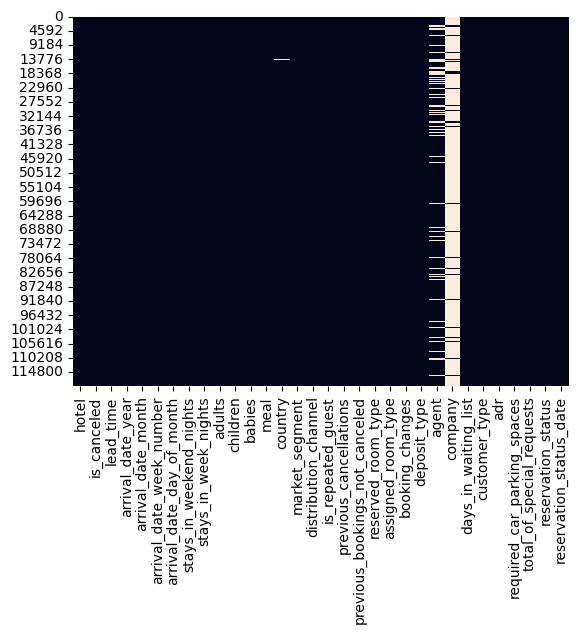

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
#assuming missing values to be zero

df['children']= df['children'].fillna(0)
df['country'] = df['country'].fillna(0)
df['agent']= df['agent'].fillna(0)
df['company']=df['company'].fillna(0)
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [15]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [16]:
#correcting the Data types
df['children']=df['children'].astype(int)
df['agent']=df['agent'].astype(int)
df['company']=df['company'].astype(int)
df[['children','agent','company']].dtypes


,0
children,int64
agent,int64
company,int64


In [17]:
#remove duplicate
df.drop_duplicates(inplace=True)
df.shape

(87396, 32)

In [18]:
# Creating new columns
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [19]:
df['total_stayes'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_stayes
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [20]:
df.adr.value_counts()

,count
adr,
0.00,1778
75.00,1320
65.00,1260
48.00,878
85.00,858
...,...
92.72,1
200.40,1
372.33,1


In [21]:
df.stays_in_weekend_nights

,stays_in_weekend_nights
0,0
1,0
2,0
3,0
4,0
...,...
119385,2
119386,2
119387,2
119388,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

In [23]:
df[['total_guests', 'total_stayes']].describe()

,total_guests,total_stayes
count,87396.000000,87396.000000
mean,2.025253,3.630658
std,0.794319,2.763449
min,0.000000,0.000000
25%,2.000000,2.000000
50%,2.000000,3.000000
75%,2.000000,5.000000
max,55.000000,69.000000


In [24]:
df['total_guests'].value_counts()

,count
total_guests,
2,57057
1,16072
3,10078
4,3870
0,166
5,136
26,5
10,2
12,2


In [25]:
df['total_stayes'].value_counts()

,count
total_stayes,
3,17839
1,17184
2,15745
4,13575
7,7527
5,6742
6,3271
10,1076
8,1067


### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0, 0.5, 'Number of Bookings')

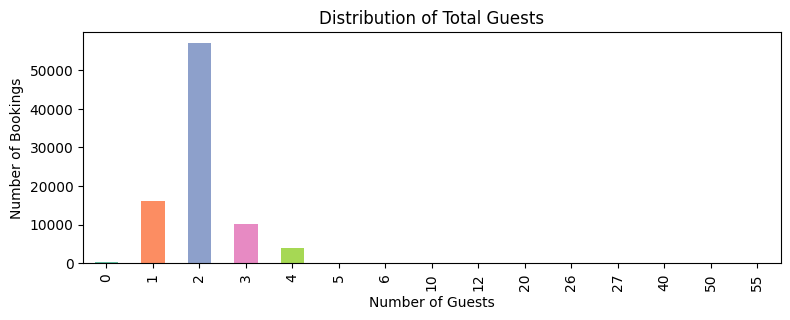

In [26]:
plt.figure(figsize = (9,3))
df['total_guests'].value_counts().sort_index().plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.title('Distribution of Total Guests')
plt.xlabel('Number of Guests')
plt.ylabel('Number of Bookings')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

Text(0, 0.5, 'Number of Bookings')

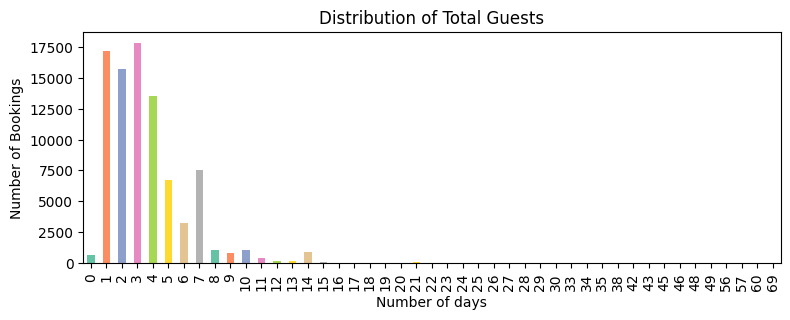

In [27]:
# Chart - 2 visualization code
plt.figure(figsize = (9,3))
df['total_stayes'].value_counts().sort_index().plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.title('Distribution of Total Guests')
plt.xlabel('Number of days')
plt.ylabel('Number of Bookings')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

This shows that stays of 3 nights, 1 night, 2 nights, and 4 nights are the most frequent. There's also a significant number of stays for 7 nights. Interestingly, there are 651 bookings with 0 total stays, which could indicate same-day check-in/check-out or data entryAnswer Here



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [28]:
# Chart - 3 visualization code
df.hotel.value_counts()

,count
hotel,
City Hotel,53428
Resort Hotel,33968


<Axes: ylabel='count'>

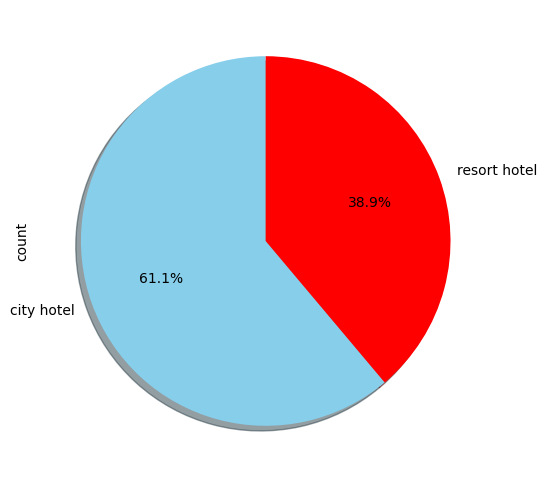

In [29]:
df.hotel.value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['city hotel','resort hotel'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

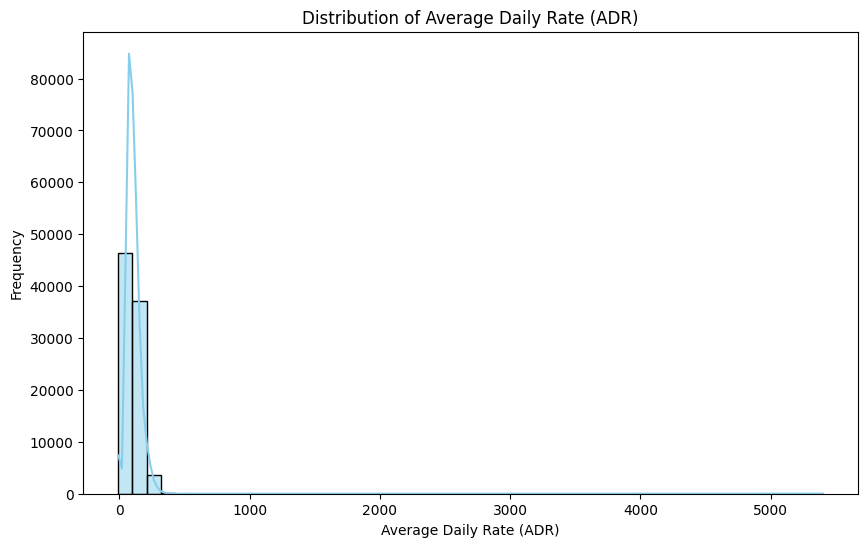

In [30]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

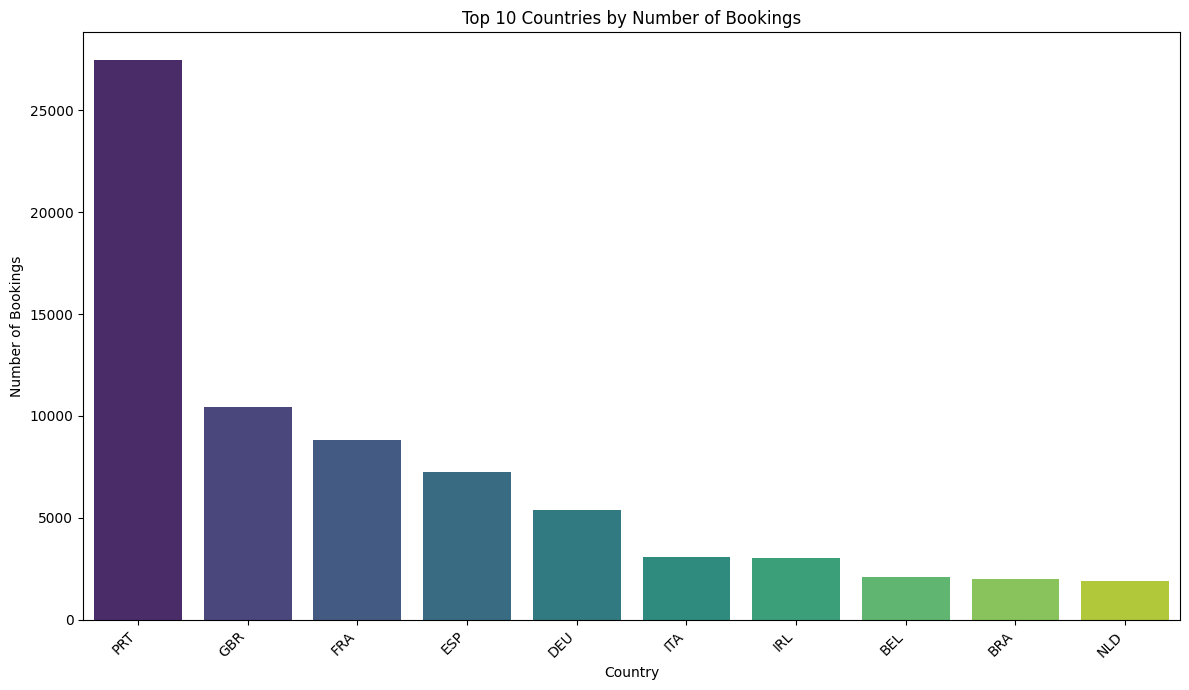

In [31]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis', hue=top_countries.index, legend=False)
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

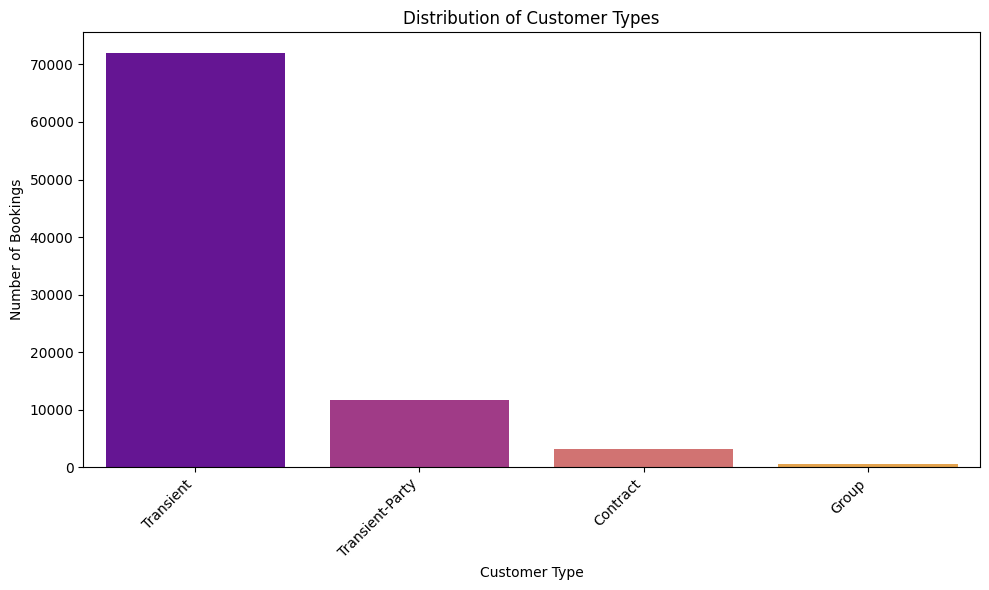

In [32]:
customer_type_counts = df['customer_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values, palette='plasma', hue=customer_type_counts.index, legend=False)
plt.title('Distribution of Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

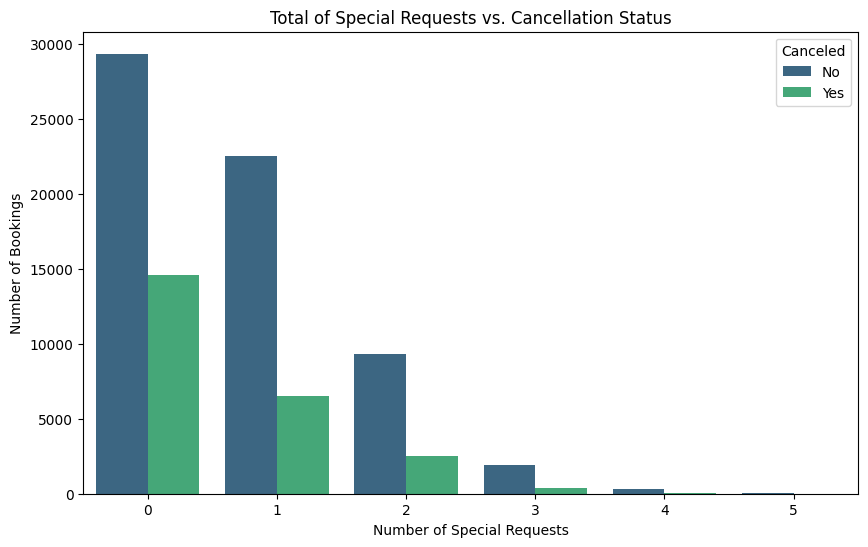

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', hue='is_canceled', data=df, palette='viridis')
plt.title('Total of Special Requests vs. Cancellation Status')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

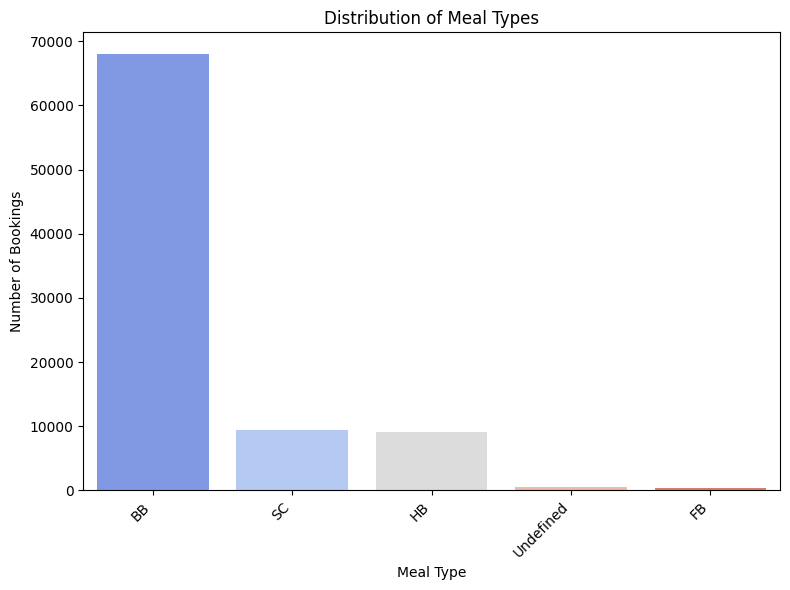

In [34]:
meal_counts = df['meal'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=meal_counts.index, y=meal_counts.values, palette='coolwarm', hue=meal_counts.index, legend=False)
plt.title('Distribution of Meal Types')
plt.xlabel('Meal Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

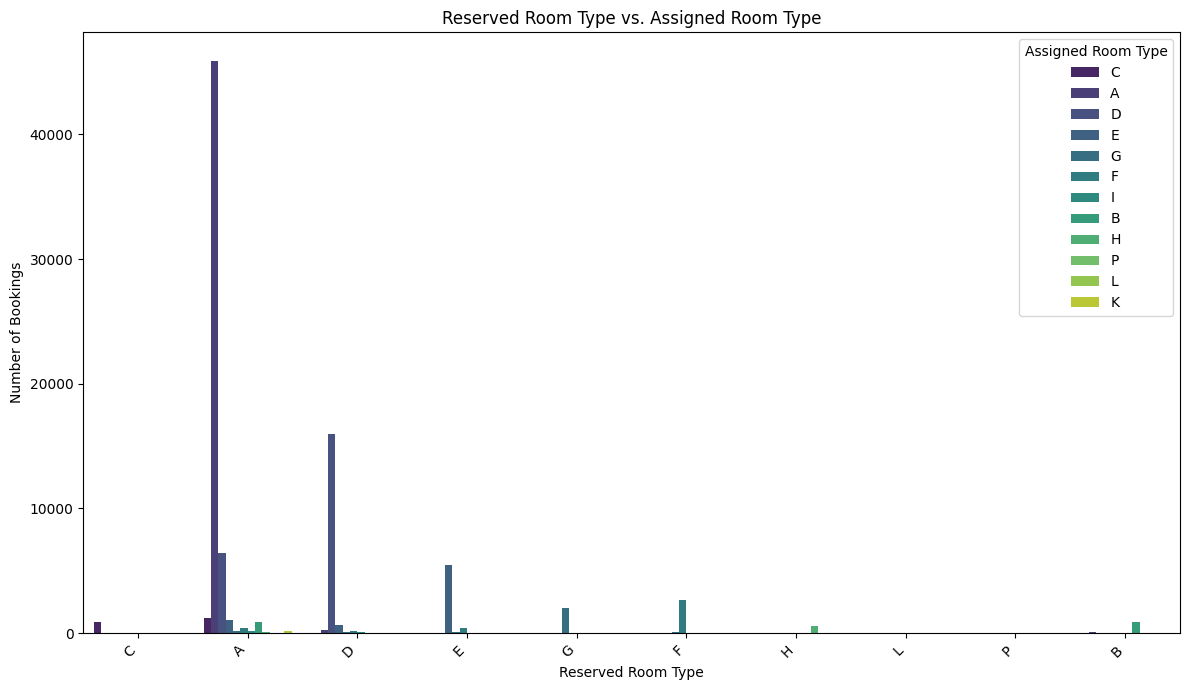

In [35]:
plt.figure(figsize=(12, 7))
sns.countplot(x='reserved_room_type', hue='assigned_room_type', data=df, palette='viridis')
plt.title('Reserved Room Type vs. Assigned Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Assigned Room Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [37]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

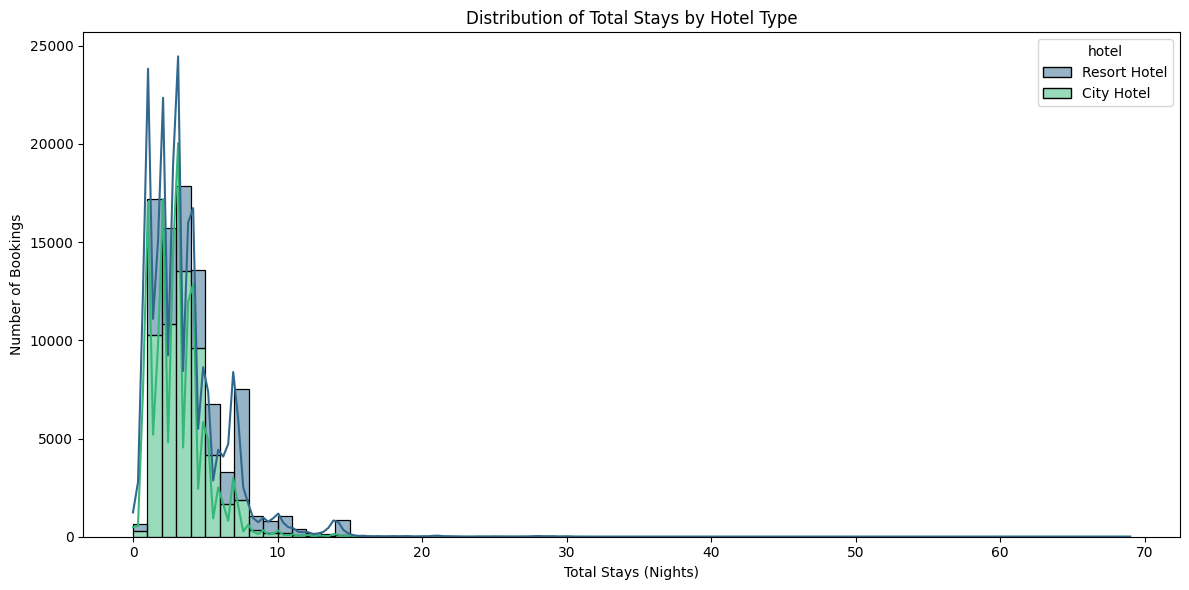

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='total_stayes', hue='hotel', multiple='stack', bins=range(0, 20), palette='viridis', kde=True)
plt.title('Distribution of Total Stays by Hotel Type')
plt.xlabel('Total Stays (Nights)')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

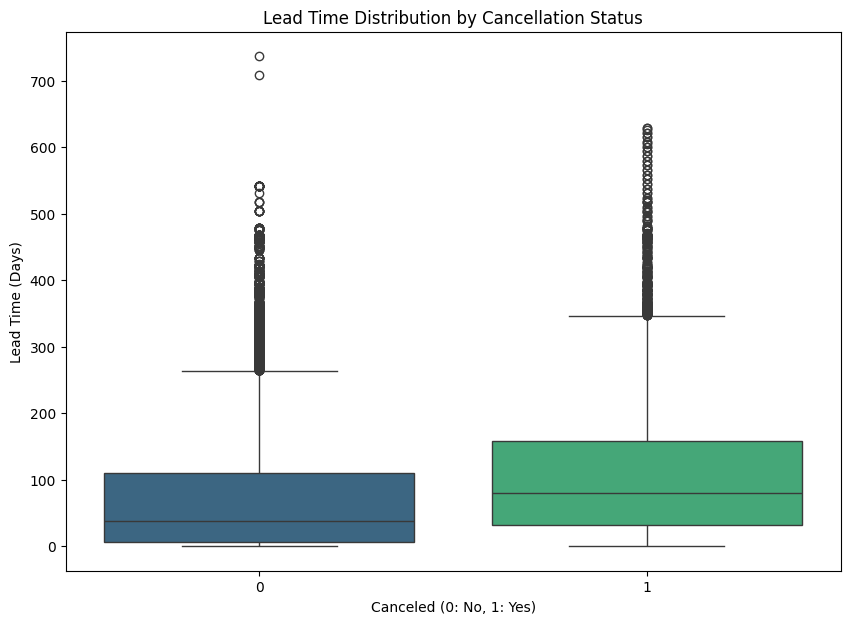

In [39]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 7))
sns.boxplot(x='is_canceled', y='lead_time', hue='is_canceled', data=df, palette='viridis', legend=False)
plt.title('Lead Time Distribution by Cancellation Status')
plt.xlabel('Canceled (0: No, 1: Yes)')
plt.ylabel('Lead Time (Days)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

/tmp/ipython-input-3873161564.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette='viridis')


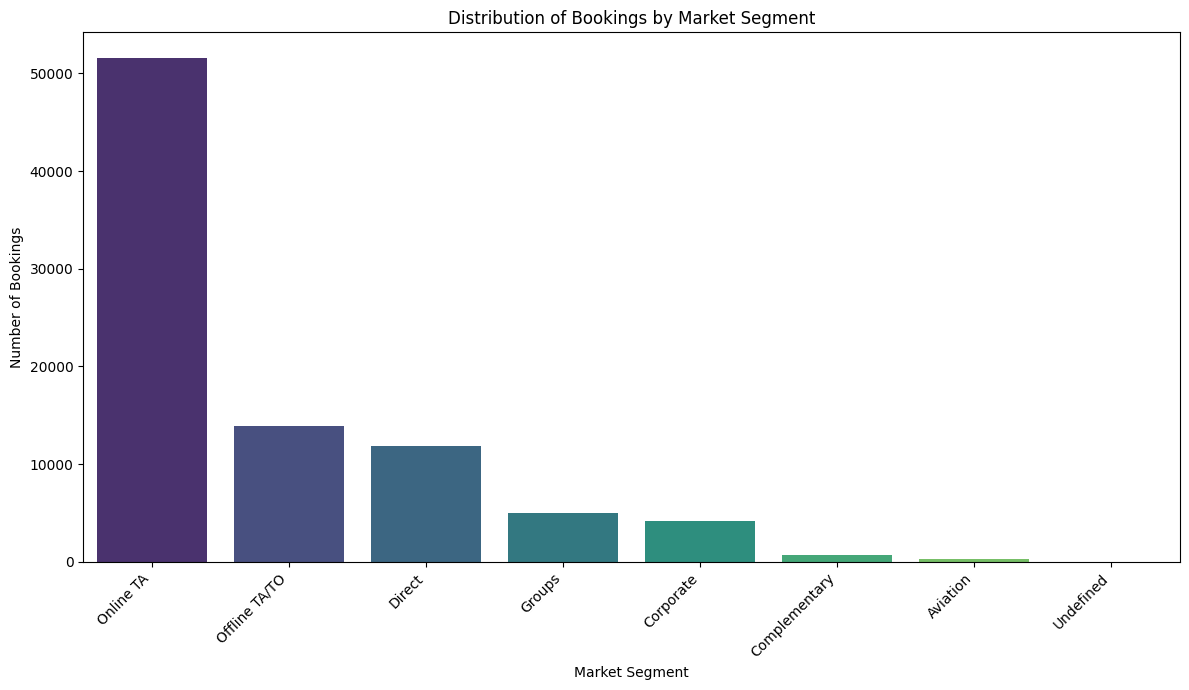

In [40]:
market_segment_counts = df['market_segment'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette='viridis')
plt.title('Distribution of Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [41]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_stayes
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [48]:
list(df.describe().columns)

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'total_guests',
 'total_stayes']

In [49]:
df[list(df.describe().columns)].head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_guests,total_stayes
0,0,342,2015,27,1,0,0,2,0,0,...,3,0,0,0,0.0,0,0,2015-07-01,2,0
1,0,737,2015,27,1,0,0,2,0,0,...,4,0,0,0,0.0,0,0,2015-07-01,2,0
2,0,7,2015,27,1,0,1,1,0,0,...,0,0,0,0,75.0,0,0,2015-07-02,1,1
3,0,13,2015,27,1,0,1,1,0,0,...,0,304,0,0,75.0,0,0,2015-07-02,1,1
4,0,14,2015,27,1,0,2,2,0,0,...,0,240,0,0,98.0,0,1,2015-07-03,2,2


In [51]:
df[list(df.describe().columns)].corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_guests,total_stayes
is_canceled,1.000000,0.184806,0.088030,0.001443,0.005328,0.060191,0.082928,0.081816,0.067369,-0.020543,...,-0.093644,-0.000900,-0.074758,0.004464,0.127986,-0.184206,-0.120545,-0.033860,0.100257,0.084102
lead_time,0.184806,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,0.028650,-0.003614,...,0.077028,0.080448,-0.079176,0.132152,0.023564,-0.086541,0.034240,0.114202,0.126736,0.318272
arrival_date_year,0.088030,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041158,-0.023334,...,0.008604,-0.001891,0.021269,-0.027939,0.176088,-0.039807,0.064268,0.909016,0.050744,0.004630
arrival_date_week_number,0.001443,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.013450,0.014260,...,0.011902,0.019594,-0.022627,0.013843,0.098279,0.008946,0.046599,-0.163390,0.028973,0.030693
arrival_date_day_of_month,0.005328,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015821,-0.000393,...,0.006307,0.006102,-0.000486,0.006588,0.022591,0.009167,-0.001651,0.028672,0.008136,-0.027597
stays_in_weekend_nights,0.060191,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028561,0.013668,...,0.050316,0.158389,-0.090461,-0.031680,0.038972,-0.042920,0.032396,0.004246,0.087979,0.786262
stays_in_week_nights,0.082928,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030479,0.016009,...,0.085044,0.190041,-0.065747,0.001905,0.053298,-0.044303,0.037823,-0.002843,0.095166,0.950577
adults,0.081816,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023712,0.016640,...,-0.048061,0.029627,-0.174455,-0.015740,0.248999,0.007802,0.112772,0.034441,0.804715,0.103992
children,0.067369,0.028650,0.041158,0.013450,0.015821,0.028561,0.030479,0.023712,1.000000,0.017423,...,0.031313,0.042034,-0.051048,-0.020419,0.326293,0.036332,0.044596,0.041110,0.595109,0.033315
babies,-0.020543,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,0.017423,1.000000,...,0.081035,0.028949,-0.011428,-0.006840,0.023446,0.030885,0.094820,-0.017382,0.166135,0.017000


In [53]:
df_corr = df.drop(columns = ['hotel','arrival_date_month','customer_type','reservation_status'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Select a subset of numerical columns for a more focused pairplot
selected_numerical_cols = [
    'is_canceled',
    'lead_time',
    'adr',
    'total_guests',
    'total_stayes',
    'previous_cancellations',
    'total_of_special_requests'
]

sns.pairplot(df[selected_numerical_cols], hue='is_canceled', diag_kind='kde')
plt.suptitle('Pair Plot of Key Numerical Features (Colored by Cancellation Status)', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

In [ ]:
# Generate a full pairplot of all numerical columns
numerical_df_full = df.select_dtypes(include=np.number)
sns.pairplot(numerical_df_full)
plt.suptitle('Full Pair Plot of All Numerical Features', y=1.02)
plt.show()

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***